## Applied Machine Learning, Module 1:  A simple classification task

* A low value of “k” (close to 1) is more likely to overfit the training data and lead to worse accuracy on the test data, compared to higher values of “k”.
* Setting “k” to the number of points in the training set will result in a classifier that always predicts the majority class.
* The k-nearest neighbors classification algorithm has to memorize all of the training examples to make a prediction.
* Why is it important to examine your dataset as a first step in applying machine learning?
    * See what type of cleaning or preprocessing still needs to be done
    * You might notice missing data
    * Gain insight on what machine learning model might be appropriate, if any
    * Get a sense for how difficult the problem might be
    
* What is the purpose of splitting the dataset into training and test sets?
    * To estimate how well the learned model will generalize to new data
* What is the purpose of setting the random_state parameter in train_test_split?
    * To make experiments easily reproducible by always using the same partitioning of the data



### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

In [31]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(fruits).sort_values(by='Nulls', ascending=False))

Data shape: (59, 7)
___________________________
Data Types:
float64    3
object     2
int64      2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
color_score,float64,59,27,0,0.55,0.93
fruit_label,int64,59,4,0,1,4
fruit_name,object,59,4,0,apple,orange
fruit_subtype,object,59,10,0,braeburn,unknown
height,float64,59,28,0,4.0,10.5
mass,int64,59,40,0,76,362
width,float64,59,24,0,5.8,9.6


<IPython.core.display.Javascript object>


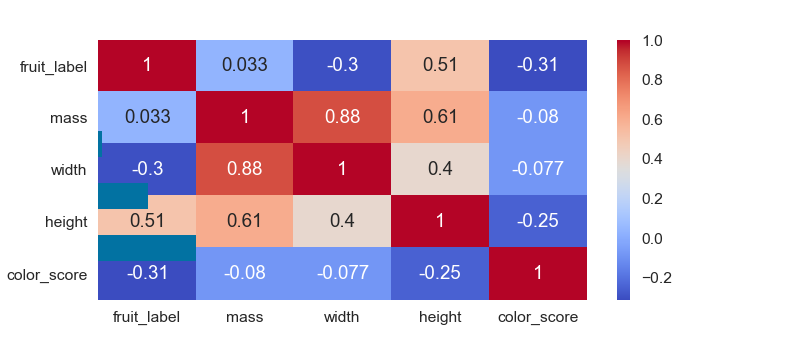

In [39]:
plt.figure(figsize=(7,3))
fruits.corr()["fruit_label"].sort_values().plot.barh();

In [40]:
# plt.figure(figsize=(15,10))
sns.heatmap(fruits.corr(),annot=True, cmap="coolwarm");

<IPython.core.display.Javascript object>


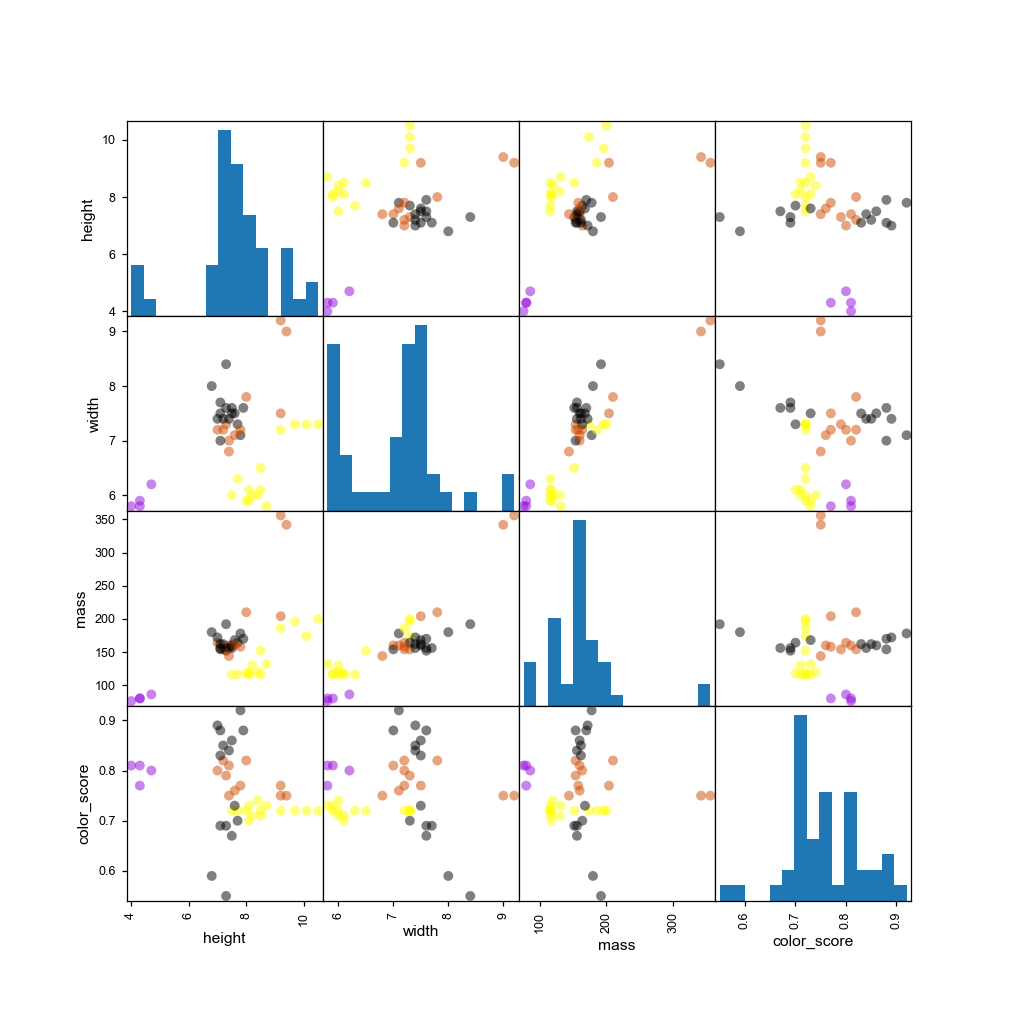

In [4]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


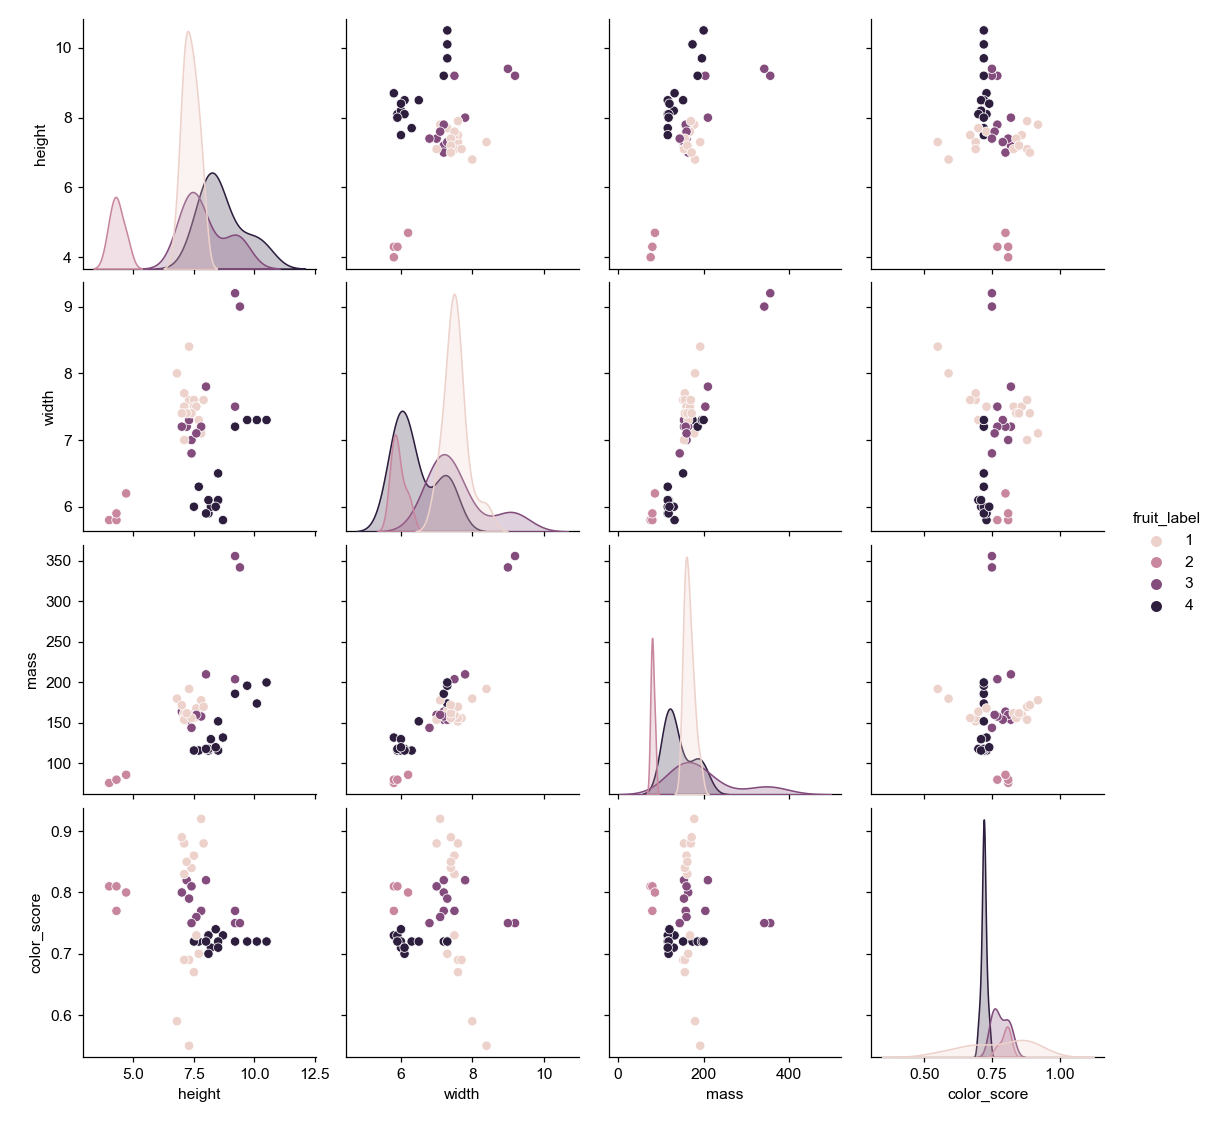

In [5]:
# Alternative
import seaborn as sns
sns.pairplot(pd.concat([X_train,y_train],axis=1),hue='fruit_label');

<IPython.core.display.Javascript object>


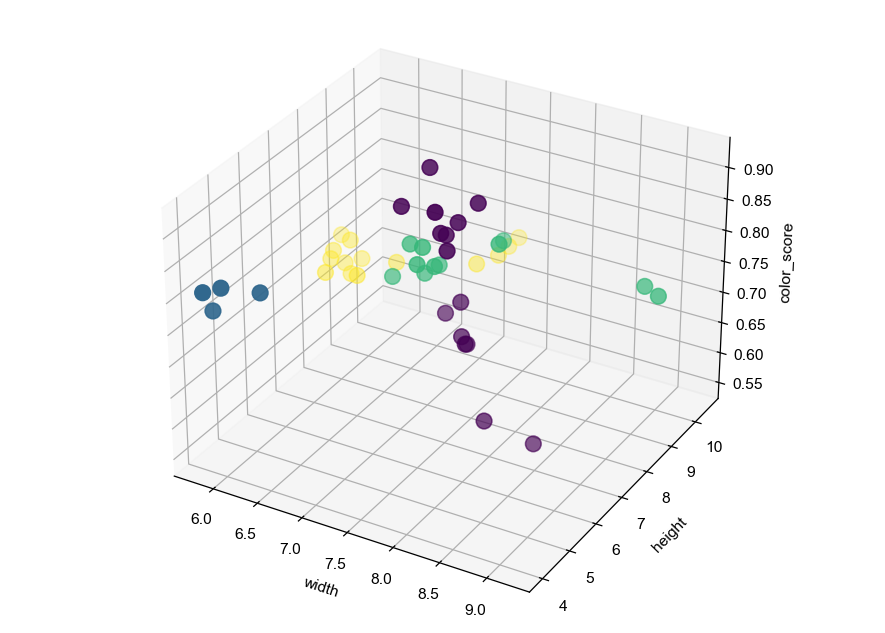

In [6]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection = '3d') # alternative
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [10]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [11]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [12]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [13]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


<IPython.core.display.Javascript object>


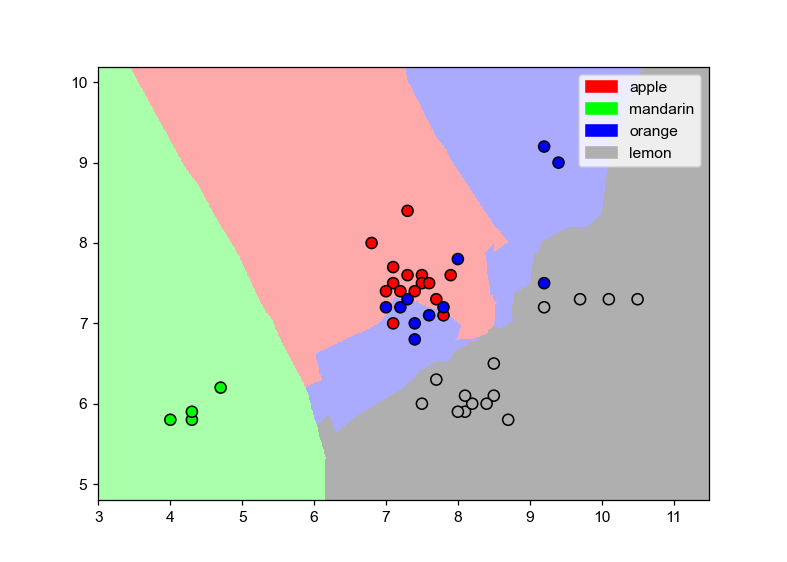

In [14]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

In [15]:
k_range = range(1,20)
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak


for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 


<IPython.core.display.Javascript object>


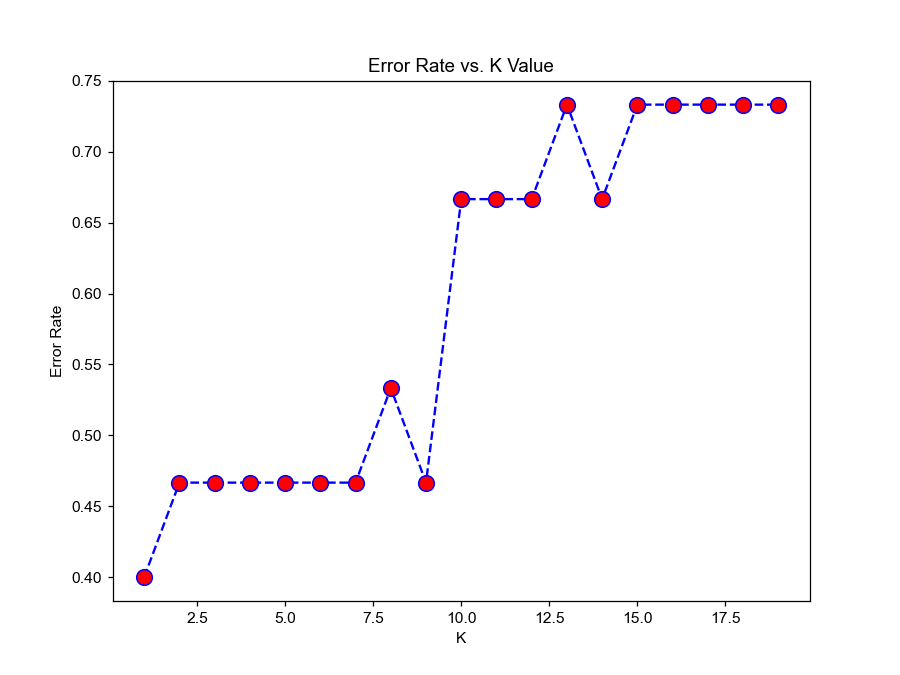

In [16]:
plt.figure(figsize=(8,6))
plt.plot(k_range,
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [17]:
acc = []
# Will take some time
from sklearn import metrics
for i in k_range:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

<IPython.core.display.Javascript object>


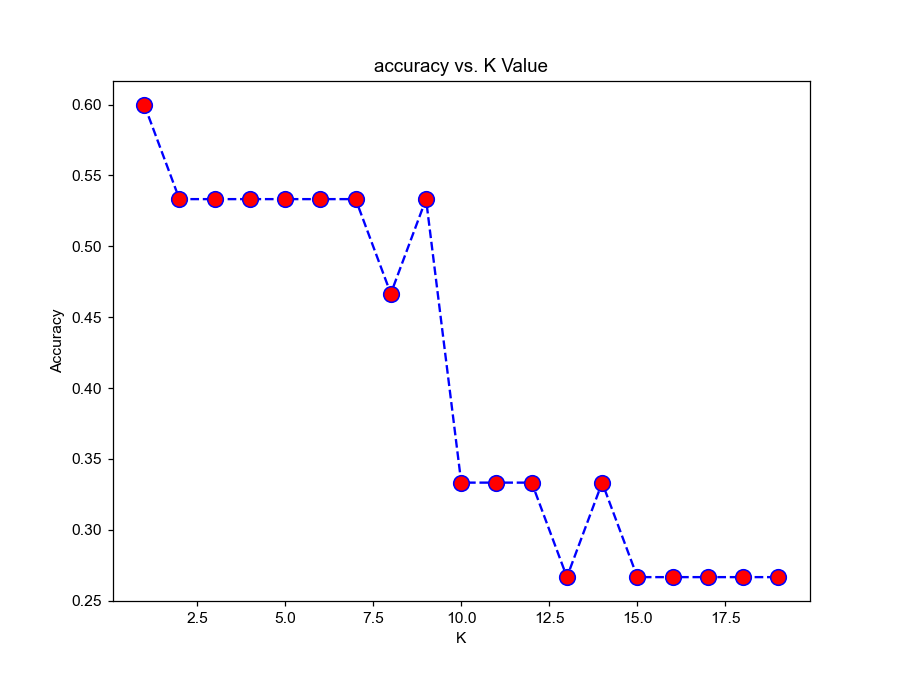

Text(0, 0.5, 'Accuracy')

In [18]:
plt.figure(figsize=(8,6))
plt.plot(k_range,
         acc,
         color = 'blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red', 
         markersize=10);
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Accuracy, error rate in tersi oluyor

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


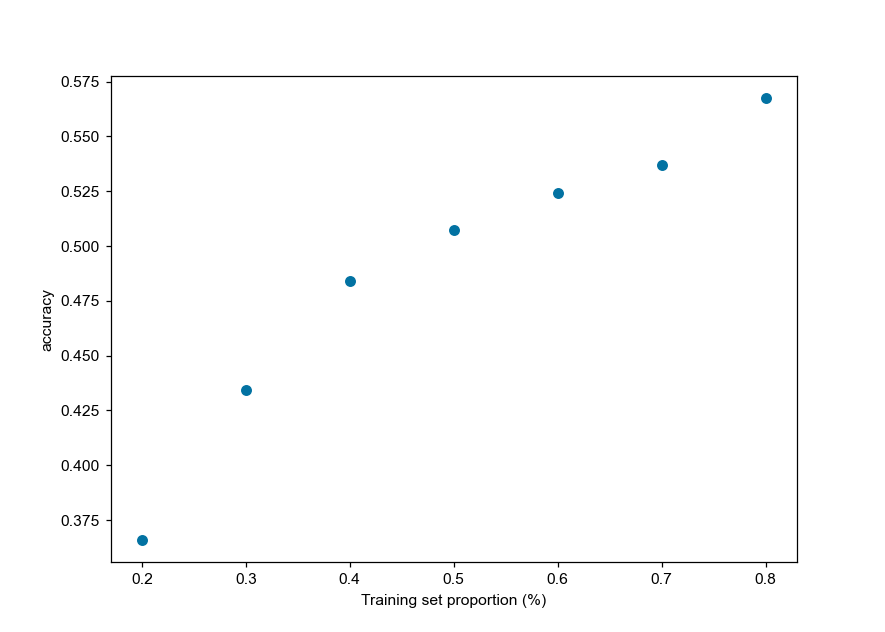

In [19]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'WITH K={5}',
      *confusion_matrix(y_test,y_pred),
      classification_report(y_test,y_pred),sep='\n')

WITH K=5
[ 1  0 15  0]
[5 0 0 0]
[ 3  0 11  0]
[8 0 5 0]
              precision    recall  f1-score   support

           1       0.06      0.06      0.06        16
           2       0.00      0.00      0.00         5
           3       0.35      0.79      0.49        14
           4       0.00      0.00      0.00        13

    accuracy                           0.25        48
   macro avg       0.10      0.21      0.14        48
weighted avg       0.12      0.25      0.16        48

